# Equipo 3

 - Jose Luis Bracamonte Amavizca
 - Hugo de Jesus Valenzuela
 - Manuel Alberto Valenzuela

## Importación de librerias

In [23]:
# hide warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Markdown as md
from wineclasifier import WineMultiClassifier
%matplotlib inline

In [3]:
# variables
download_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
y_categories = [7,6,5]
w_clasifier = WineMultiClassifier(download_url, y_categories = y_categories)

## Descargando e importando el set de datos de vino blanco

Los datos con los que haremos nuestro análisis corresponden a muestras tomadas del vino blanco de el norte de Portugal, datos que corresponden a características físico-químicas del vino. El  [dataset de vinos blancos](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv) es público y disponible para investigaciones, cuenta con la [descripción de los datos](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names) disponible al público también.

#### Descarga datos y creando data frame

In [4]:
w_clasifier.data_download()
w_clasifier.data_read()
w_clasifier.data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### Descripcion de datos

In [5]:
w_clasifier.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##### Valores nulos

In [6]:
w_clasifier.data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Correlacion de datos

In [7]:
w_clasifier.data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot:>

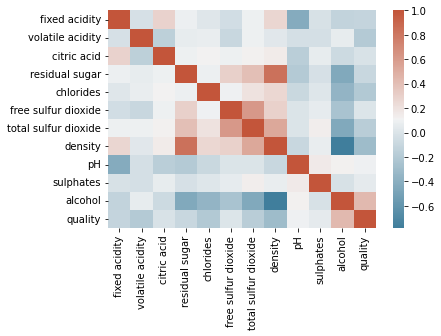

In [8]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(w_clasifier.data.corr(),cmap=cmap)

### Informacion de los datos

Los datos contienen 11 variables y en la columna 12 está es score que corresponde a la calidad del vino, con rango de 0 a 10.

In [9]:
md(w_clasifier.columns_as_md())    

### Lista de variables
    1 - Acidez fija
    2 - Acidez volatil
    3 - Acido citrico
    4 - Azucar residual
    5 - Cloruros
    6 - Dioxido de sulfuro libre
    7 - Dioxido de sulfuro total
    8 - Densidad
    9 - pH
    10 - Sulfatos
    11 - alcohol

#### Partiendo los datos para entrenamiento y prueba

Utilizamos la funcion `train_test_split` y dividoremos los datos en un 80% para entrenamiento y 20% para pruebas

In [10]:
w_clasifier.train_test_split()

(array([[ 6.8 ,  0.33,  0.28, ...,  3.19,  0.41, 13.  ],
        [ 8.6 ,  0.2 ,  0.42, ...,  3.11,  0.49, 11.4 ],
        [ 5.6 ,  0.27,  0.37, ...,  3.29,  0.33, 13.1 ],
        ...,
        [ 7.9 ,  0.33,  0.28, ...,  3.15,  0.38,  8.8 ],
        [ 8.9 ,  0.26,  0.33, ...,  3.13,  0.46, 10.8 ],
        [ 7.9 ,  0.51,  0.34, ...,  3.09,  0.51, 10.  ]]),
 array([[ 7.3 ,  0.32,  0.35, ...,  3.24,  0.42, 10.7 ],
        [ 7.  ,  0.31,  0.26, ...,  3.13,  0.46,  9.8 ],
        [ 7.6 ,  0.14,  0.74, ...,  3.07,  0.4 , 10.8 ],
        ...,
        [ 5.9 ,  0.2 ,  0.28, ...,  3.4 ,  0.41, 11.4 ],
        [ 6.  ,  0.14,  0.17, ...,  3.05,  0.57,  9.8 ],
        [ 6.7 ,  0.54,  0.27, ...,  3.16,  0.38,  9.4 ]]),
 array([1, 0, 1, ..., 1, 1, 2]),
 array([2, 1, 0, ..., 1, 1, 4]))

### Escalamiento de características

In [11]:
w_clasifier.feature_fit_and_tranform_X()

# Mapa de modelos

Se utilizan varios modelos de clasificacion para comparar y seleccionar un modelo que ofrezca predicciones con mayor precision.


In [12]:
w_clasifier.add_default_models()

In [13]:
md(w_clasifier.models_as_md_short("Lista de Modelos"))

### Lista de Modelos
- LogisticRegression: Logistic Regression
- K-NN: K Nearest Neighbors
- SVM: Support Vector Machine
- Kernel SVM: Kernel - Support Vector Machine
- Naive Bayes: Naive Bayes
- Decision Tree Classification: Decision Tree Classification
- Random Forest Classification: Random Forest Classification

##### Entrenamiento

El entrenamiento de los modelos mencionado se realizara juntos dentro de la funcion que se preparo en el codigo de entrenamiento.

In [14]:
w_clasifier.train_models()

##### Metricas del modelo

Para las metricas del modelo, se calcula la matriz de confusión y el score de precisión.

In [15]:
w_clasifier.fill_metrics()

In [16]:
md(w_clasifier.models_as_md_acc("Score de precision de los Modelos"))

### Score de precision de los Modelos
- LogisticRegression => Accuracy:53.71 %
- K-NN => Accuracy:55.35 %
- SVM => Accuracy:53.63 %
- Kernel SVM => Accuracy:56.08 %
- Naive Bayes => Accuracy:46.78 %
- Decision Tree Classification => Accuracy:60.00 %
- Random Forest Classification => Accuracy:64.65 %

In [17]:
md(w_clasifier.models_as_md_kfold("Validacion Cruzada K-Fold de los Modelos"))

### Validacion Cruzada K-Fold de los Modelos
- LogisticRegression => Accuracy: 55.51 %  , std:2.387195 %
- K-NN => Accuracy: 57.80 %  , std:2.501462 %
- SVM => Accuracy: 54.34 %  , std:2.575360 %
- Kernel SVM => Accuracy: 59.84 %  , std:2.144997 %
- Naive Bayes => Accuracy: 47.95 %  , std:2.350387 %
- Decision Tree Classification => Accuracy: 61.86 %  , std:1.451171 %
- Random Forest Classification => Accuracy: 66.73 %  , std:2.322584 %

#### Matrices de confusion de los modelos

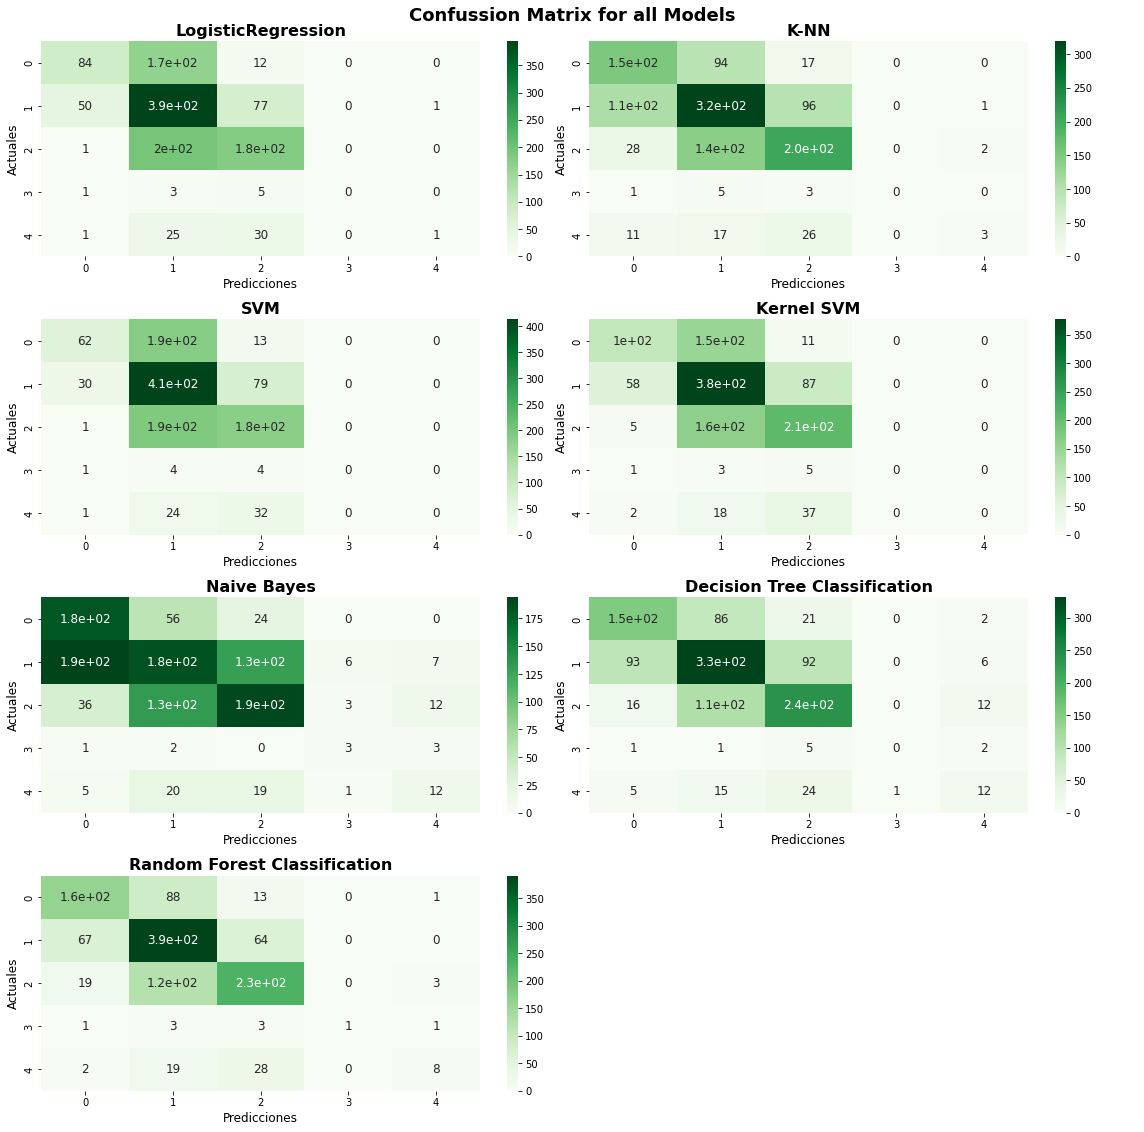

In [18]:
fig, axs = w_clasifier.cm_as_plots()
plt.tight_layout()
plt.show()

# Modelo sin separacion de clases

In [19]:
w2_clasifier = WineMultiClassifier(download_url)
w2_clasifier.do_all()
md(w2_clasifier.models_as_md_acc("Score de precision de los Modelos"))

### Score de precision de los Modelos
- LogisticRegression => Accuracy:52.24 %
- K-NN => Accuracy:54.37 %
- SVM => Accuracy:51.02 %
- Kernel SVM => Accuracy:54.61 %
- Naive Bayes => Accuracy:44.73 %
- Decision Tree Classification => Accuracy:56.98 %
- Random Forest Classification => Accuracy:64.00 %

In [20]:
md(w2_clasifier.models_as_md_kfold("Validacion Cruzada K-Fold de los Modelos"))

### Validacion Cruzada K-Fold de los Modelos
- LogisticRegression => Accuracy: 53.85 %  , std:1.898116 %
- K-NN => Accuracy: 55.60 %  , std:2.393616 %
- SVM => Accuracy: 52.32 %  , std:1.629197 %
- Kernel SVM => Accuracy: 57.06 %  , std:1.793089 %
- Naive Bayes => Accuracy: 45.82 %  , std:2.616618 %
- Decision Tree Classification => Accuracy: 59.54 %  , std:1.725378 %
- Random Forest Classification => Accuracy: 64.13 %  , std:2.201199 %

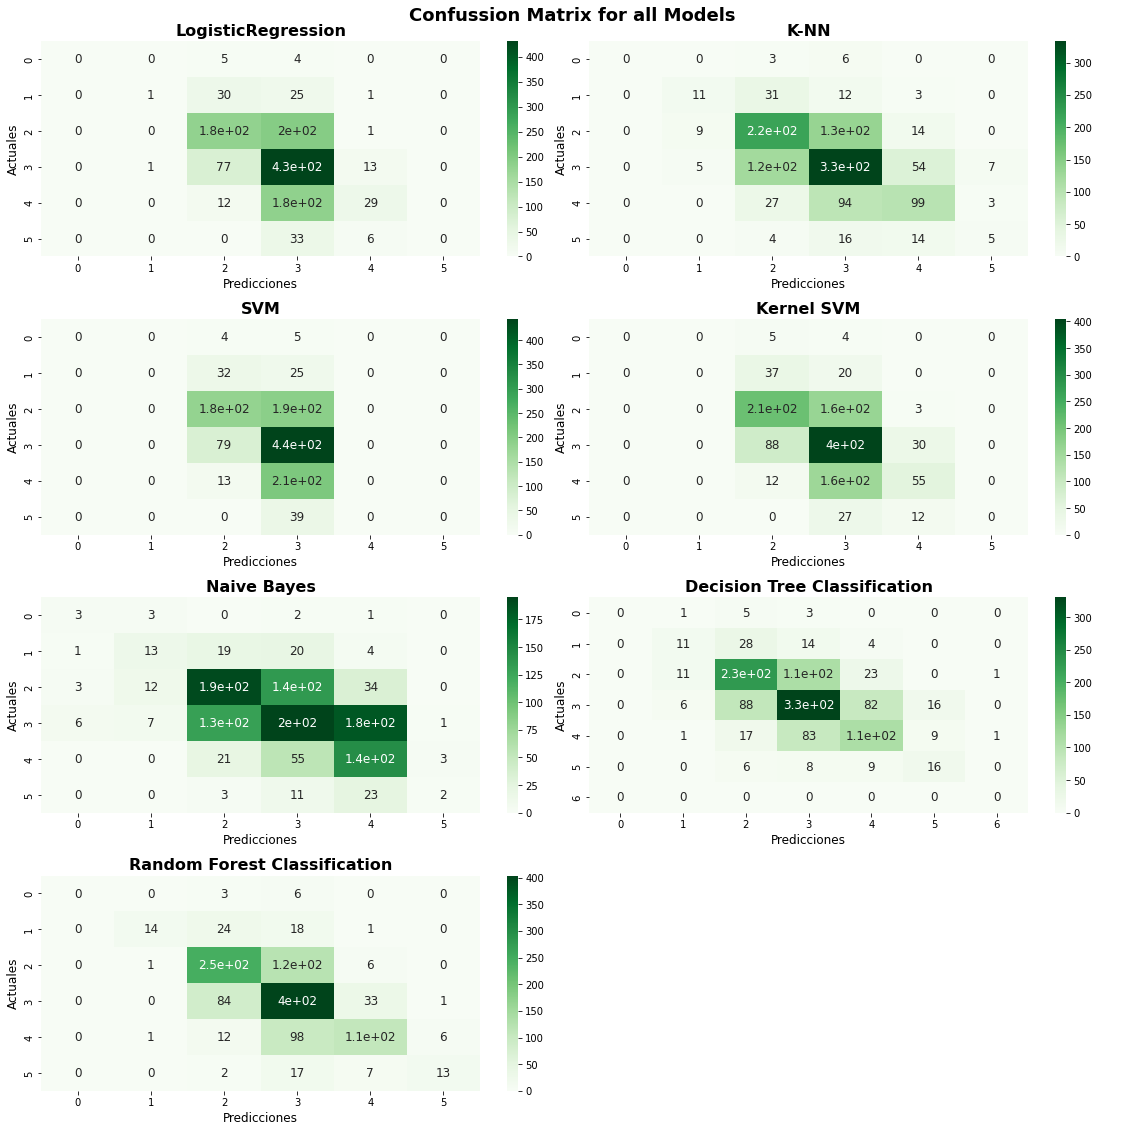

In [21]:
fig, axs = w2_clasifier.cm_as_plots()
plt.tight_layout()
plt.show()

In [66]:
df_dict = {}
df_kfold = {}
models_keys = w_clasifier.models.keys()
for i,c in enumerate([w_clasifier, w2_clasifier]):
    k = 'Modelo{}'.format(i+1)
    df_dict[k] = [m['acc'] for km,m in c.models.items()]
    df_kfold[k] = [m['kfold_stats']['mean'] for km,m in c.models.items()]
df_bars = pd.DataFrame(df_dict, index=models_keys)
df_kfold_bars = pd.DataFrame(df_kfold, index=models_keys)

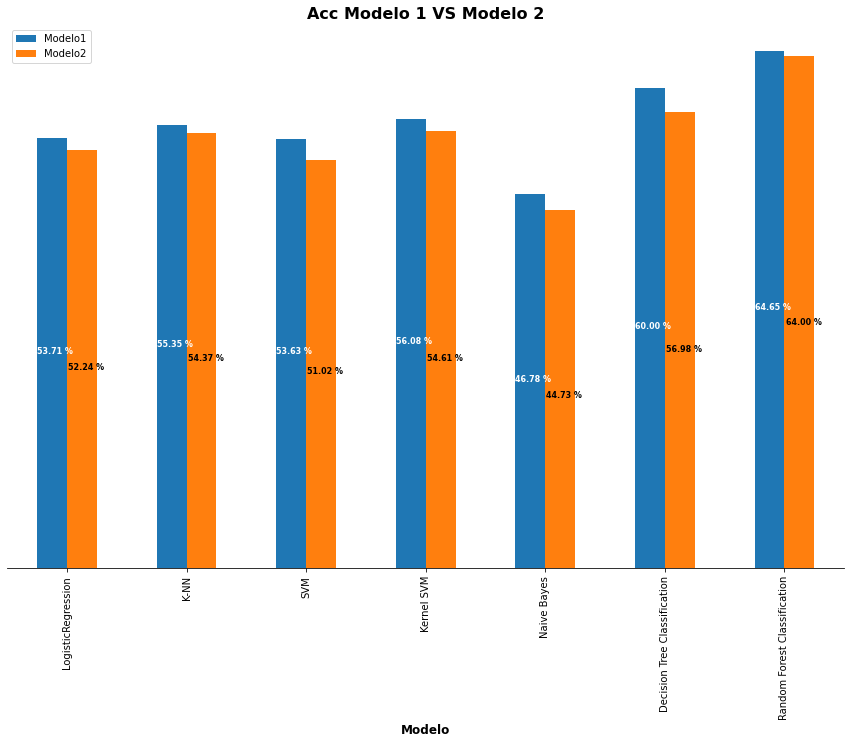

In [69]:
ax = df_bars.plot.bar(figsize=(15,10))
ax.set_title("Acc Modelo 1 VS Modelo 2",fontweight='bold', fontsize=16)
ax.set_xlabel("Modelo",fontweight='bold', fontsize=12)
ax.set_ylabel("Accuracy",fontweight='bold', fontsize=12)
ax.axes.get_yaxis().set_visible(False)
for i,v in enumerate(models_keys):
    value = df_bars.Modelo1[i]
    value2 = df_bars.Modelo2[i]
    ax.text( i - 0.25, value/2,"{:.2f} %".format(value*100), fontweight='bold', fontsize=8, color='white')
    ax.text( i + 0.01 , value2/2.1,"{:.2f} %".format(value2*100), fontweight='bold', fontsize=8, color='black')
for ax_pos in ['right', 'top', 'left']:
    ax.spines[ax_pos].set_visible(False)
plt.show()


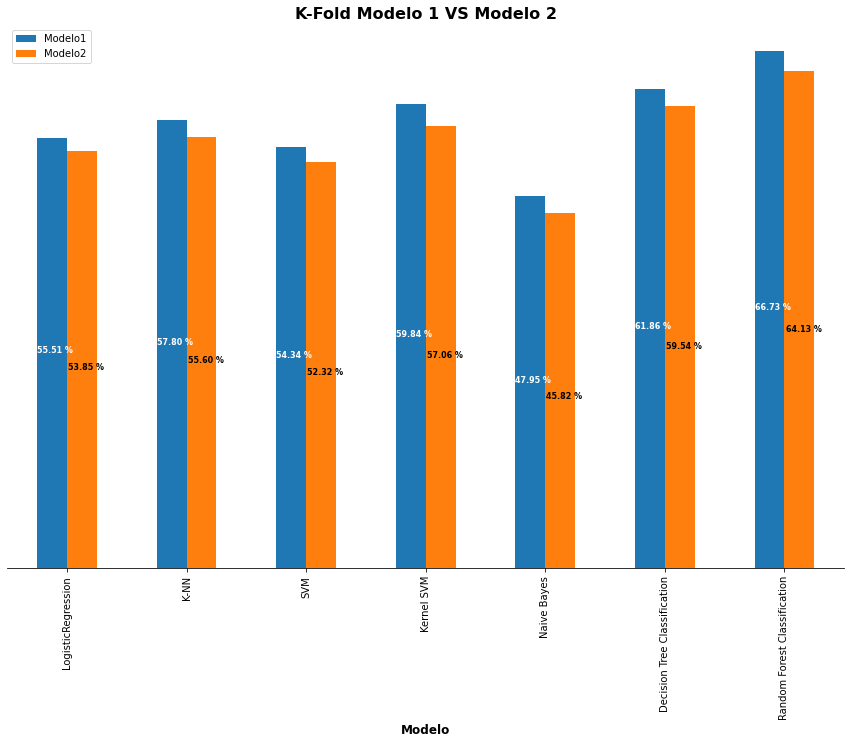

In [68]:
ax = df_kfold_bars.plot.bar(figsize=(15,10))
ax.set_title("K-Fold Modelo 1 VS Modelo 2",fontweight='bold', fontsize=16)
ax.set_xlabel("Modelo",fontweight='bold', fontsize=12)
ax.set_ylabel("K-Fold Accuracy",fontweight='bold', fontsize=12)
ax.axes.get_yaxis().set_visible(False)
for i,v in enumerate(models_keys):
    value = df_kfold_bars.Modelo1[i]
    value2 = df_kfold_bars.Modelo2[i]
    ax.text( i - 0.25, value/2,"{:.2f} %".format(value*100), fontweight='bold', fontsize=8, color='white')
    ax.text( i + 0.01 , value2/2.1,"{:.2f} %".format(value2*100), fontweight='bold', fontsize=8, color='black')
for ax_pos in ['right', 'top', 'left']:
    ax.spines[ax_pos].set_visible(False)
plt.show()